In [ ]:
import pandas as pd
df = pd.read_csv('../datasets/etl_data.csv')
df = df.rename(columns={'Dystopia Residual':'Dystopia_Residual'})

In [5]:
df.head()

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


#**EDA**
it contains some important steps:
1. Understand Dataset (Done)
2. Analyze missing data
3. Descriptive statistics
4. Visualise Relationships
5. Detect outliers
6. Generate insights



In [ ]:
# from before we can see that we no understand data and clean it as needed
# next step is number 3

In [6]:
# 3. Descriptive statistics
# Score	Economy	Family	Health	Freedom	Trust	Generosity	Dystopia Residual
# describe
numerical_cols = ['Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia_Residual']
desc_stat = df[numerical_cols].describe()

In [7]:
desc_stat

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,5.358638,0.925350,0.989009,0.578123,0.402881,0.175673,0.201135,2.086459
std,1.130546,0.415730,0.319045,0.239806,0.150828,0.131999,0.133276,0.561899
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.507500,0.602407,0.791987,0.401684,0.296264,0.075425,0.098397,1.736337
50%,5.279000,0.993550,1.025070,0.629940,0.422150,0.139362,0.180988,2.090660
75%,6.168000,1.251280,1.228467,0.763260,0.517800,0.249753,0.274161,2.451851
max,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


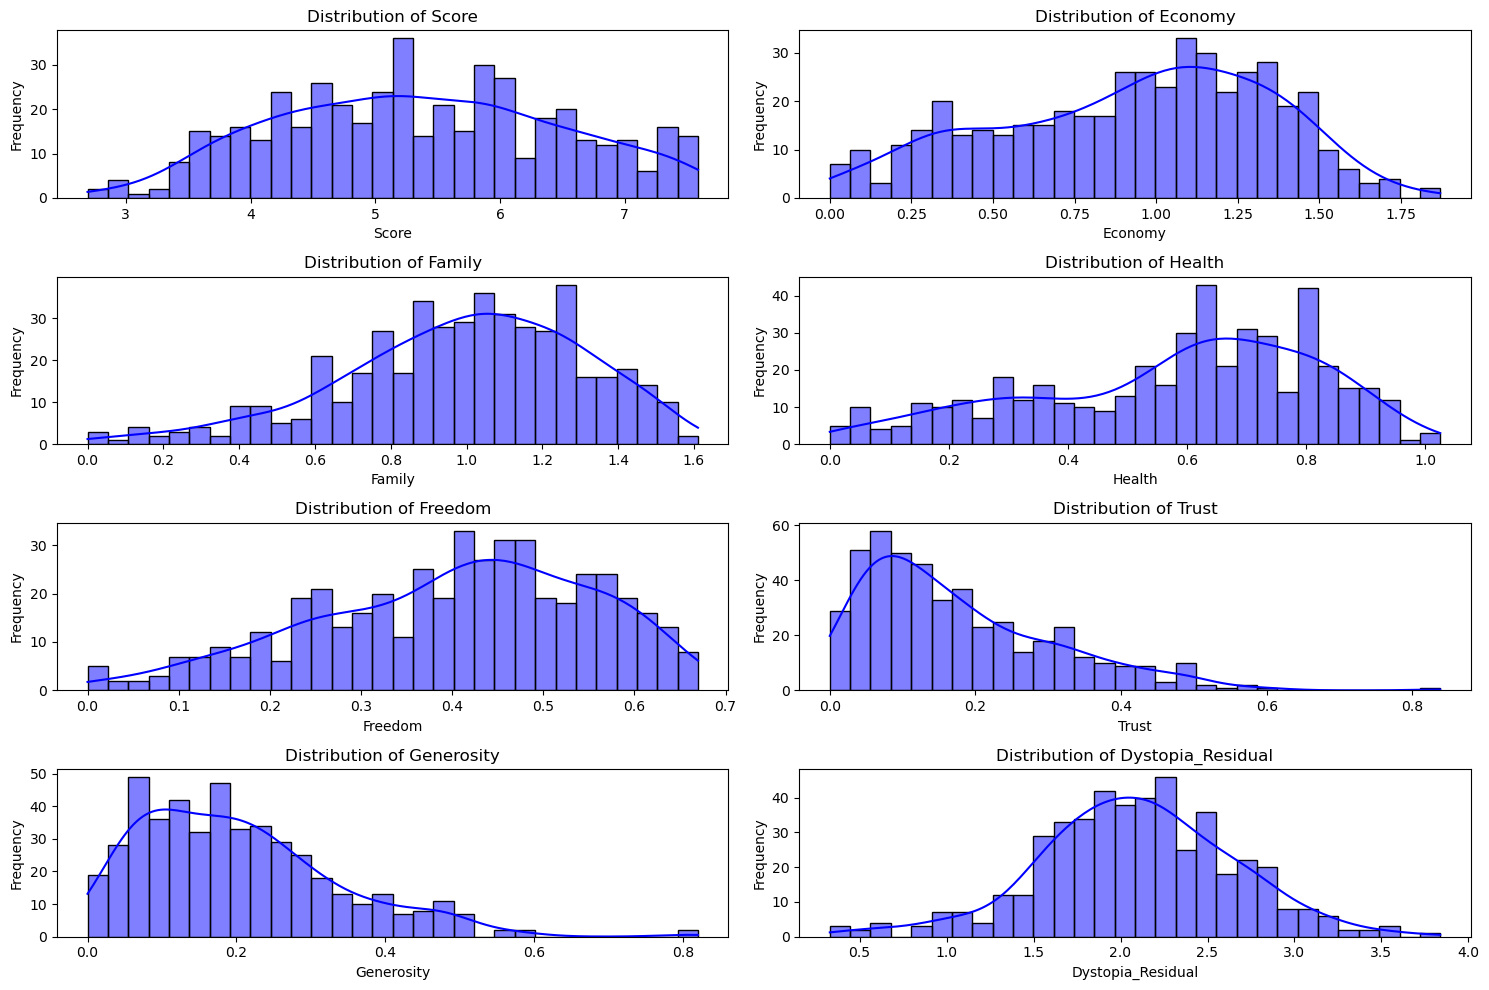

In [8]:
# 4. Relationships Visualizations
# goal is to:
# show the distribution of each col
# outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,2,i+1) # the figures that are showen how many in row and num etc.
  sns.histplot(df[col], kde = True, bins=30, color='blue') # col, kde(draw curve on them), bins(rectangles that are shown (data)), color
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


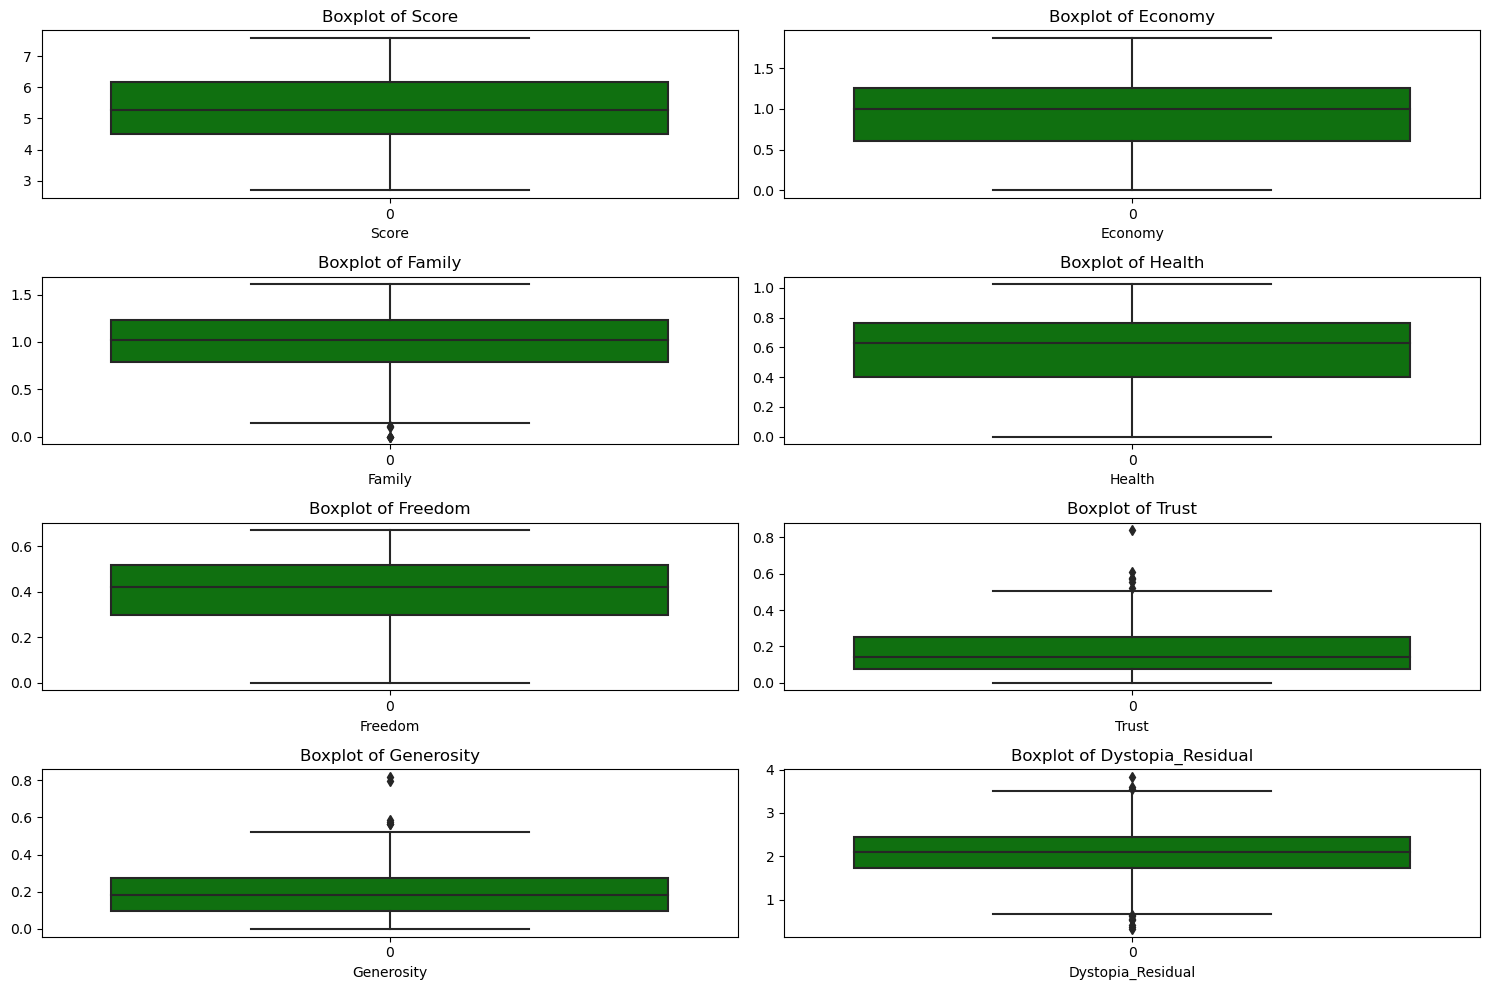

In [9]:
# Plot box plots to check for outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

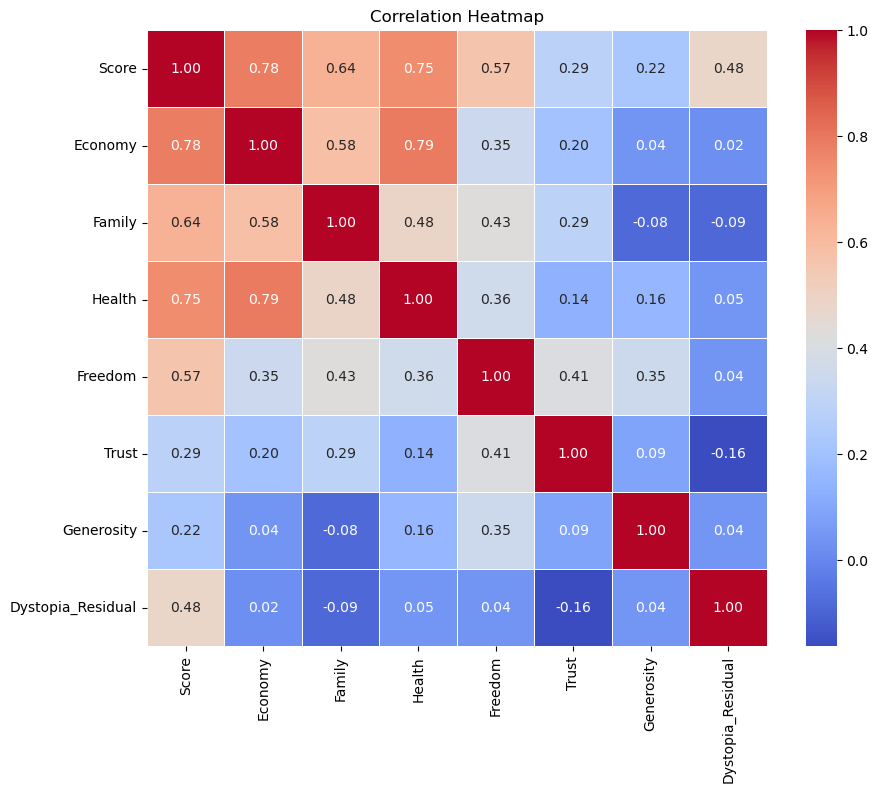

In [10]:
# 5. Correlation analysis
# Correlation heatmap
# pair plot

# Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

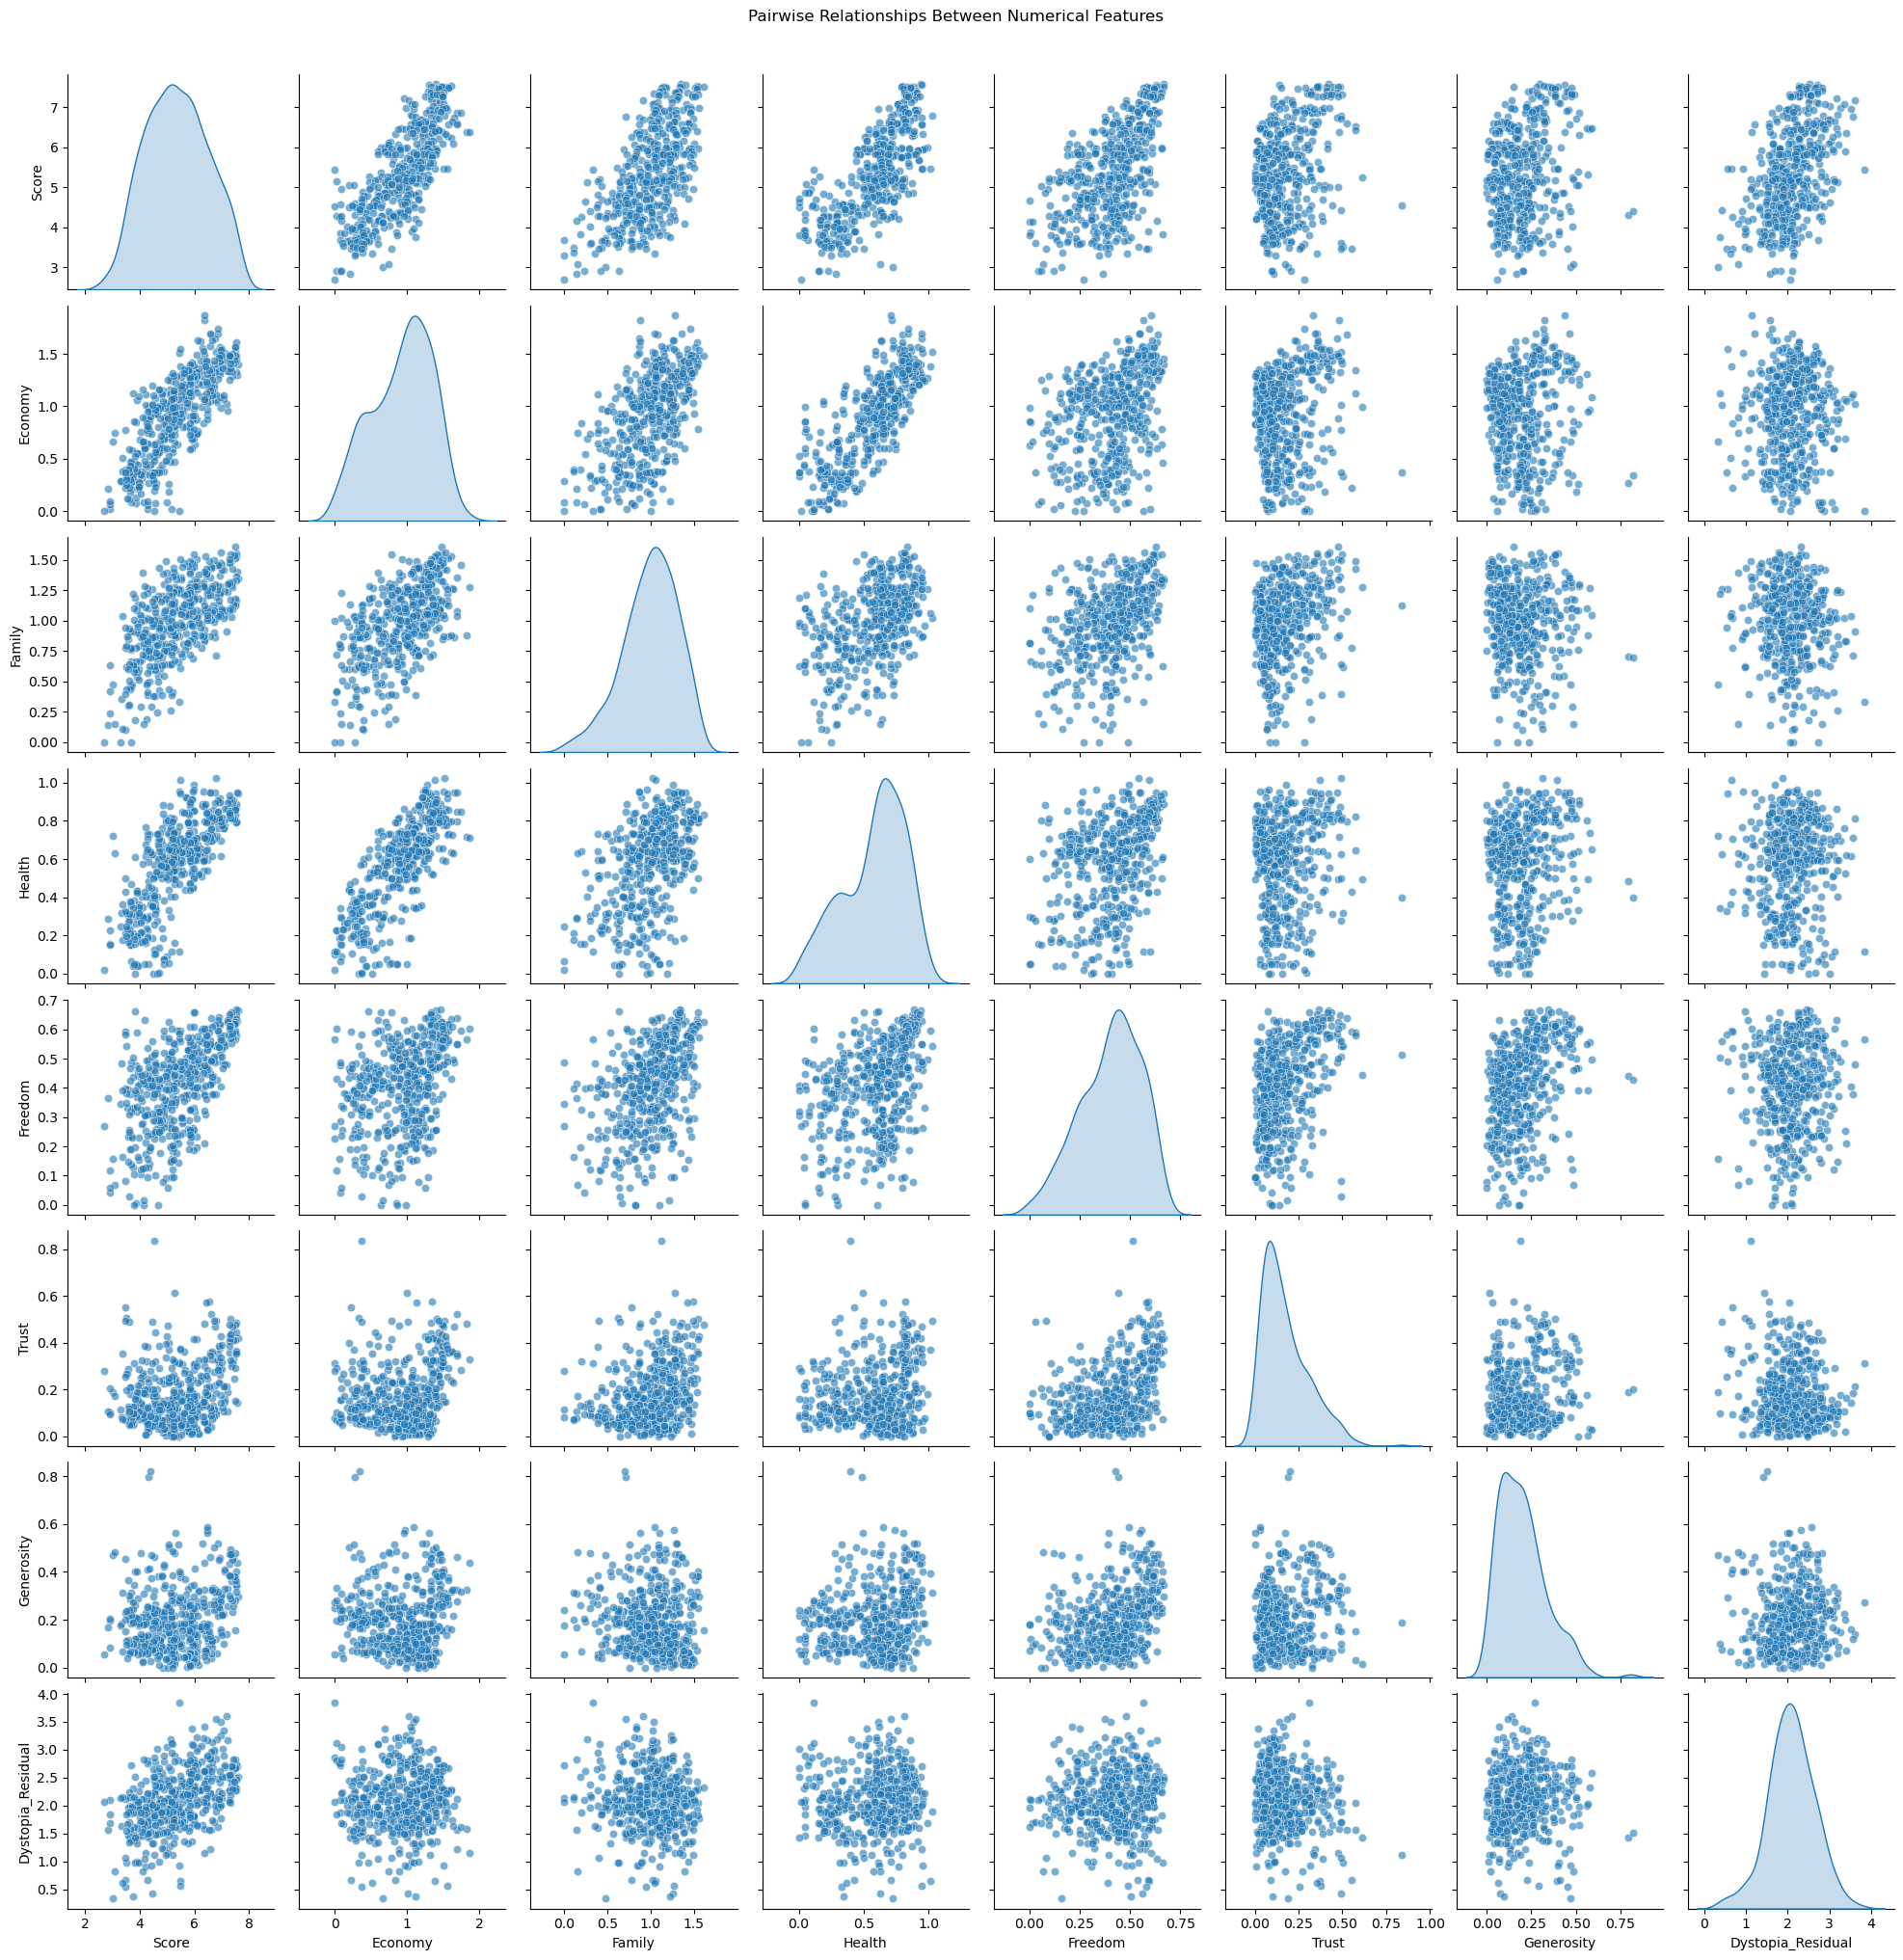

In [11]:
# Pair Plot
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Numerical Features', y=1.02)
plt.show()